In [1]:
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import os
import random
import pandas as pd
import seaborn as sns

/software/python-anaconda-2022.05-el8-x86_64/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
def ef1(x):
    x.seek(0) # this sets the pointer back to the beginning so that ef1 can run multiple times w/o getting 0's
    arrln = x.readlines()
    ef1_num = 0
    for count,line in enumerate(arrln):
        if 'Wave/freq Total Noise' in arrln[count]:
            #global ef1_num (is this line problematic?) (02/21)
            ef1_num = count + 1
            x.seek(0)
    return ef1_num

n_actual = 0
def ef2(n):
    n.seek(0)
    n2 = len(n.readlines())
    n.seek(0)
    #global n_actual
    n_actual = n2 - ef1(n)
    return n_actual

def RMS(x):
    return np.sqrt(np.sum([number **2 for number in x]))

def readdata(x): #this is for abstracting any psg output file data of diff lengths
    data = np.ndarray((ef2(x),3),float) #intializing array of unknown size
    x.seek(0)
    stop1 = int(ef1(x))
    stop2 = int(ef2(x))
    x.seek(0)
    for i in range(stop1):
        x.readline()
    for i in range(stop2):
        info = x.readline()
        #print(info)
        info = info.strip().split()
        data[i,0] = float(info[0])
        data[i,1] = float(info[1])
        data[i,2] = float(info[2])
    return data

def prettydata(x): #why won't this function work with luv_a_uv???
    return pd.DataFrame(readdata(x), columns=['Wave/freq','Total','Noise'])

In [5]:
pressure = np.zeros(72, dtype = float)
o2_conc = np.zeros(72, dtype = float)
o3_conc = np.zeros(72, dtype = float)
temp = np.zeros(72, dtype = float)

#without o3 
LA_nir = open("/project2/abbot/jeffyang/PSG/PSG_input/basefiles/psg_test_input_nir.txt", "r")
LA_uv = open("/project2/abbot/jeffyang/PSG/PSG_input/basefiles/psg_test_input_uv.txt", "r")
LA_vis = open("/project2/abbot/jeffyang/PSG/PSG_input/basefiles/psg_test_input_vis.txt", "r")
rantypes = [LA_nir]
types = ['nir']
CLOUD_THICKNESS = 6e-2 
FIRST_LEVEL_P = 1.0028e+00

for i, rantype in enumerate(rantypes):            
    type_name = types[i]
    for N in range(1):
        rantype.seek(0)
        lines = rantype.readlines()
        exp_num = N
        N1 = N
        for i, line in enumerate(lines):
            if "<ATMOSPHERE-LAYER-1>" in line:
                for z in range(72):
                    # print(lst)
                    lst = lines[i + z].removeprefix(f"<ATMOSPHERE-LAYER-{z+1}>")
                    lst = lst.split(',')
                    # print(lst)

                    pressure[z] = float(lst[0])
                    # print(pressure)
                    o3_conc[z] = float(lst[4])
                    o2_conc[z] = float(lst[8])
                    temp[z] = float(lst[1])



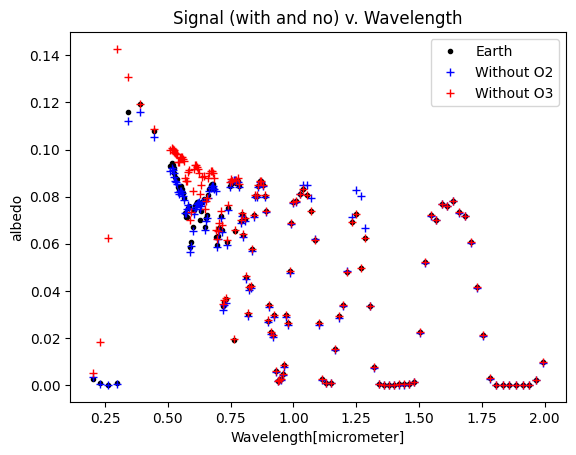

In [44]:
# CLEAR SKY DATA
# UV (200 to 525 nm), VIS (515 nm to 1030 nm), and NIR (1 to 2 microns)
# with and without o2 & o3

earth_cloud_luv_a_nir   = open(f"/Users/jeffyang/Desktop/PSG/clearsky/psg_rad_nir.txt")
earth_cloud_luv_a_uv    = open(f"/Users/jeffyang/Desktop/PSG/clearsky/psg_rad_uv.txt")
earth_cloud_luv_a_vis   = open(f"/Users/jeffyang/Desktop/PSG/clearsky/psg_rad_vis.txt")
earth_o2_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o2/psg_rad_nir.txt")
earth_o2_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o2/psg_rad_uv.txt")
earth_o2_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o2/psg_rad_vis.txt")
earth_o3_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o3/psg_rad_nir.txt")
earth_o3_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o3/psg_rad_uv.txt")
earth_o3_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/clearsky_o3/psg_rad_vis.txt")
    
a_vis       = pd.DataFrame()
a_uv        = pd.DataFrame()
a_nir       = pd.DataFrame()
a_vis_o2    = pd.DataFrame()
a_uv_o2     = pd.DataFrame()
a_nir_o2    = pd.DataFrame()
a_vis_o3    = pd.DataFrame()
a_uv_o3     = pd.DataFrame()
a_nir_o3    = pd.DataFrame()
    
a_vis       = prettydata(earth_cloud_luv_a_vis)
a_uv        = prettydata(earth_cloud_luv_a_uv)
a_nir       = prettydata(earth_cloud_luv_a_nir)
a_vis_o2    = prettydata(earth_o2_luv_a_vis)
a_uv_o2     = prettydata(earth_o2_luv_a_uv)
a_nir_o2    = prettydata(earth_o2_luv_a_nir)
a_vis_o3    = prettydata(earth_o3_luv_a_vis)
a_uv_o3     = prettydata(earth_o3_luv_a_uv)
a_nir_o3    = prettydata(earth_o3_luv_a_nir)

frame_w     = [a_uv, a_vis, a_nir]
frame_o2    = [a_uv_o2, a_vis_o2, a_nir_o2]
frame_o3    = [a_uv_o3, a_vis_o3, a_nir_o3]

all_a_with  = pd.concat(frame_w, ignore_index= True) 
all_a_o2    = pd.concat(frame_o2, ignore_index= True)
all_a_o3    = pd.concat(frame_o3, ignore_index= True)
    
signal_a_o2    = all_a_o2['Total'] - all_a_with['Total']
signal_a_o3    = all_a_o3['Total'] - all_a_with['Total']
noise_a = all_a_with['Noise'] #noise should be the same for all_a_with and all_a_no right? check cuz data show otherwise
    
signal_a_o2_list    = signal_a_o2.tolist() #convert signal_a from series to list
signal_a_o3_list    = signal_a_o3.tolist() #convert signal_a from series to list
noise_a_list        = noise_a.tolist() #convert noise_a from series to list

snr_o2 = []
snr_o3 = []
for i in range(signal_a_o2.size):
        snr = signal_a_o2_list[i] / noise_a_list[i]
        snr_o2.append(snr)
        snr = signal_a_o3_list[i] / noise_a_list[i]
        snr_o3.append(snr)

clsky_SNR_o2 = RMS(snr_o2)
clsky_SNR_o3 = RMS(snr_o3)

f1 = plt.figure()
plt.plot(all_a_with['Wave/freq'], all_a_with['Total'],'k.')
plt.plot(all_a_o2['Wave/freq'],all_a_o2['Total'],'b+')
plt.plot(all_a_o3['Wave/freq'],all_a_o3['Total'],'r+')

plt.xlabel('Wavelength[micrometer]')
plt.ylabel('albedo')
plt.legend(['Earth','Without O2','Without O3'])
plt.title('Signal (with and no) v. Wavelength')
plt.savefig(f"/Users/jeffyang/Desktop/PSG/clearsky/Signal v. Wavelength.png")


In [35]:
# DATA VARYING PRESSURE
# UV (200 to 525 nm), VIS (515 nm to 1030 nm), and NIR (1 to 2 microns)
# with and without o2 & o3
lsty_o2 = []
lsty_o3 = []
# f = open(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/SNRresults", "w")
for N in range (1,15):
#     f.write(f"mmr{trial}, N{N}:\n")
    earth_cloud_luv_a_nir   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3/mmr_N{N}/mmr_N{N}_nir.txt")
    earth_cloud_luv_a_uv    = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3/mmr_N{N}/mmr_N{N}_uv.txt")
    earth_cloud_luv_a_vis   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3/mmr_N{N}/mmr_N{N}_vis.txt")
    earth_o2_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o2/mmr_N{N}/mmr_N{N}_nir.txt")
    earth_o2_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o2/mmr_N{N}/mmr_N{N}_uv.txt")
    earth_o2_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o2/mmr_N{N}/mmr_N{N}_vis.txt")
    earth_o3_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o3/mmr_N{N}/mmr_N{N}_nir.txt")
    earth_o3_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o3/mmr_N{N}/mmr_N{N}_uv.txt")
    earth_o3_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/mmr3_without_o3/mmr_N{N}/mmr_N{N}_vis.txt")
        
    a_vis       = pd.DataFrame()
    a_uv        = pd.DataFrame()
    a_nir       = pd.DataFrame()
    a_vis_o2    = pd.DataFrame()
    a_uv_o2     = pd.DataFrame()
    a_nir_o2    = pd.DataFrame()
    a_vis_o3    = pd.DataFrame()
    a_uv_o3     = pd.DataFrame()
    a_nir_o3    = pd.DataFrame()
        
    a_vis       = prettydata(earth_cloud_luv_a_vis)
    a_uv        = prettydata(earth_cloud_luv_a_uv) 
    a_nir       = prettydata(earth_cloud_luv_a_nir)
    a_vis_o2    = prettydata(earth_o2_luv_a_vis)
    a_uv_o2     = prettydata(earth_o2_luv_a_uv)
    a_nir_o2    = prettydata(earth_o2_luv_a_nir)
    a_vis_o3    = prettydata(earth_o3_luv_a_vis)
    a_uv_o3     = prettydata(earth_o3_luv_a_uv)
    a_nir_o3    = prettydata(earth_o3_luv_a_nir)

    frame_w     = [a_uv, a_vis, a_nir]
    frame_o2    = [a_uv_o2, a_vis_o2, a_nir_o2]
    frame_o3    = [a_uv_o3, a_vis_o3, a_nir_o3]

    all_a_with  = pd.concat(frame_w, ignore_index= True) 
    all_a_o2    = pd.concat(frame_o2, ignore_index= True)
    all_a_o3    = pd.concat(frame_o3, ignore_index= True)
           
    signal_a_o2 = all_a_o2['Total']- all_a_with['Total']
    signal_a_o3 = all_a_o3['Total']- all_a_with['Total']
    noise_a     = all_a_with['Noise'] #noise should be the same for all_a_with and all_a_no right? check cuz data show otherwise
        
    signal_a_o2_list = signal_a_o2.tolist() #convert signal_a from series to list
    signal_a_o3_list = signal_a_o3.tolist() #convert signal_a from series to list
    noise_a_list     = noise_a.tolist() #convert noise_a from series to list

    snr_o2 = []
    snr_o3 = []
    for i in range(signal_a_o2.size):
            snr = signal_a_o2_list[i] / noise_a_list[i]
            snr_o2.append(snr)
            snr = signal_a_o3_list[i] / noise_a_list[i]
            snr_o3.append(snr)

    SNR_o2 = RMS(snr_o2)
    SNR_o3 = RMS(snr_o3)
#     f.write('SNR (noise with):' + " " + str(SNR) + "\n")
    lsty_o2.append(SNR_o2)
    lsty_o3.append(SNR_o3)
    
#     f1 = plt.figure()
#     plt.plot(all_a_with['Wave/freq'], all_a_with['Total'],'.')
#     plt.plot(all_a_no['Wave/freq'],all_a_no['Total'],'+')
#     plt.xlabel('Wavelength[micrometer]')
#     plt.ylabel('albedo')
#     plt.title('Signal (with and no) v. Wavelength')
#     plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/N_{N}")
# f.close()


In [89]:
# DATA varying Sizes
# UV (200 to 525 nm), VIS (515 nm to 1030 nm), and NIR (1 to 2 microns)
# with and without o2 & o3
lsty_o2_level4 = []
lsty_o3_level4 = []
lsty_o2_level14 = []
lsty_o3_level14 = []
# f = open(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/SNRresults", "w")
for N in range (5):
#     f.write(f"mmr{trial}, N{N}:\n")
    earth_cloud_luv_a_nir   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size{N}_nir.txt")
    earth_cloud_luv_a_uv    = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size{N}_uv.txt")
    earth_cloud_luv_a_vis   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size{N}_vis.txt")
    earth_o2_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size{N}_nir.txt")
    earth_o2_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size{N}_uv.txt")
    earth_o2_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size{N}_vis.txt")
    earth_o3_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size{N}_nir.txt")
    earth_o3_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size{N}_uv.txt")
    earth_o3_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size{N}_vis.txt")
        
    a_vis       = pd.DataFrame()
    a_uv        = pd.DataFrame()
    a_nir       = pd.DataFrame()
    a_vis_o2    = pd.DataFrame()
    a_uv_o2     = pd.DataFrame()
    a_nir_o2    = pd.DataFrame()
    a_vis_o3    = pd.DataFrame()
    a_uv_o3     = pd.DataFrame()
    a_nir_o3    = pd.DataFrame()
        
    a_vis       = prettydata(earth_cloud_luv_a_vis)
    a_uv        = prettydata(earth_cloud_luv_a_uv) 
    a_nir       = prettydata(earth_cloud_luv_a_nir)
    a_vis_o2    = prettydata(earth_o2_luv_a_vis)
    a_uv_o2     = prettydata(earth_o2_luv_a_uv)
    a_nir_o2    = prettydata(earth_o2_luv_a_nir)
    a_vis_o3    = prettydata(earth_o3_luv_a_vis)
    a_uv_o3     = prettydata(earth_o3_luv_a_uv)
    a_nir_o3    = prettydata(earth_o3_luv_a_nir)

    frame_w     = [a_uv, a_vis, a_nir]
    frame_o2    = [a_uv_o2, a_vis_o2, a_nir_o2]
    frame_o3    = [a_uv_o3, a_vis_o3, a_nir_o3]

    all_a_with  = pd.concat(frame_w, ignore_index= True) 
    all_a_o2    = pd.concat(frame_o2, ignore_index= True)
    all_a_o3    = pd.concat(frame_o3, ignore_index= True)
           
    signal_a_o2 = all_a_o2['Total']- all_a_with['Total']
    signal_a_o3 = all_a_o3['Total']- all_a_with['Total']
    noise_a     = all_a_with['Noise'] #noise should be the same for all_a_with and all_a_no right? check cuz data show otherwise
        
    signal_a_o2_list = signal_a_o2.tolist() #convert signal_a from series to list
    signal_a_o3_list = signal_a_o3.tolist() #convert signal_a from series to list
    noise_a_list     = noise_a.tolist() #convert noise_a from series to list

    snr_o2 = []
    snr_o3 = []
    for i in range(signal_a_o2.size):
            snr = signal_a_o2_list[i] / noise_a_list[i]
            snr_o2.append(snr)
            snr = signal_a_o3_list[i] / noise_a_list[i]
            snr_o3.append(snr)

    SNR_o2 = RMS(snr_o2)
    SNR_o3 = RMS(snr_o3)
#     f.write('SNR (noise with):' + " " + str(SNR) + "\n")
    lsty_o2_level4.append(SNR_o2)
    lsty_o3_level4.append(SNR_o3)


for N in range (5):
#     f.write(f"mmr{trial}, N{N}:\n")
    earth_cloud_luv_a_nir   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size14_{N}_nir.txt")
    earth_cloud_luv_a_uv    = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size14_{N}_uv.txt")
    earth_cloud_luv_a_vis   = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size/size{N}/size14_{N}_vis.txt")
    earth_o2_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size14_{N}_nir.txt")
    earth_o2_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size14_{N}_uv.txt")
    earth_o2_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o2/size{N}/size14_{N}_vis.txt")
    earth_o3_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size14_{N}_nir.txt")
    earth_o3_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size14_{N}_uv.txt")
    earth_o3_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/psg_output_size/size_without_o3/size{N}/size14_{N}_vis.txt")
        
    a_vis       = pd.DataFrame()
    a_uv        = pd.DataFrame()
    a_nir       = pd.DataFrame()
    a_vis_o2    = pd.DataFrame()
    a_uv_o2     = pd.DataFrame()
    a_nir_o2    = pd.DataFrame()
    a_vis_o3    = pd.DataFrame()
    a_uv_o3     = pd.DataFrame()
    a_nir_o3    = pd.DataFrame()
        
    a_vis       = prettydata(earth_cloud_luv_a_vis)
    a_uv        = prettydata(earth_cloud_luv_a_uv) 
    a_nir       = prettydata(earth_cloud_luv_a_nir)
    a_vis_o2    = prettydata(earth_o2_luv_a_vis)
    a_uv_o2     = prettydata(earth_o2_luv_a_uv)
    a_nir_o2    = prettydata(earth_o2_luv_a_nir)
    a_vis_o3    = prettydata(earth_o3_luv_a_vis)
    a_uv_o3     = prettydata(earth_o3_luv_a_uv)
    a_nir_o3    = prettydata(earth_o3_luv_a_nir)

    frame_w     = [a_uv, a_vis, a_nir]
    frame_o2    = [a_uv_o2, a_vis_o2, a_nir_o2]
    frame_o3    = [a_uv_o3, a_vis_o3, a_nir_o3]

    all_a_with  = pd.concat(frame_w, ignore_index= True) 
    all_a_o2    = pd.concat(frame_o2, ignore_index= True)
    all_a_o3    = pd.concat(frame_o3, ignore_index= True)
           
    signal_a_o2 = all_a_o2['Total']- all_a_with['Total']
    signal_a_o3 = all_a_o3['Total']- all_a_with['Total']
    noise_a     = all_a_with['Noise'] #noise should be the same for all_a_with and all_a_no right? check cuz data show otherwise
        
    signal_a_o2_list = signal_a_o2.tolist() #convert signal_a from series to list
    signal_a_o3_list = signal_a_o3.tolist() #convert signal_a from series to list
    noise_a_list     = noise_a.tolist() #convert noise_a from series to list

    snr_o2 = []
    snr_o3 = []
    for i in range(signal_a_o2.size):
            snr = signal_a_o2_list[i] / noise_a_list[i]
            snr_o2.append(snr)
            snr = signal_a_o3_list[i] / noise_a_list[i]
            snr_o3.append(snr)

    SNR_o2 = RMS(snr_o2)
    SNR_o3 = RMS(snr_o3)
#     f.write('SNR (noise with):' + " " + str(SNR) + "\n")
    lsty_o2_level14.append(SNR_o2)
    lsty_o3_level14.append(SNR_o3)
    
#     f1 = plt.figure()
#     plt.plot(all_a_with['Wave/freq'], all_a_with['Total'],'.')
#     plt.plot(all_a_no['Wave/freq'],all_a_no['Total'],'+')
#     plt.xlabel('Wavelength[micrometer]')
#     plt.ylabel('albedo')
#     plt.title('Signal (with and no) v. Wavelength')
#     plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/N_{N}")
# f.close()


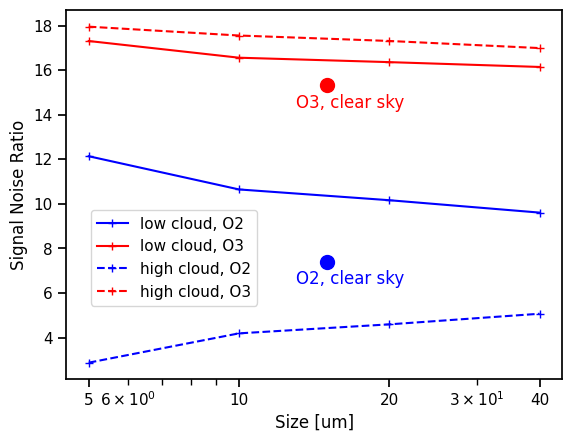

In [68]:
## Summary of Pressure Experiments
sns.set_context('notebook')
fig = plt.figure()
lstx = [5,10,20,40]
ax1 = fig.add_subplot(111)
# ax2 = ax1.twiny()

ax1.plot(lstx,lsty_o2_level4,'-+',color='b',label='low cloud, O2')
ax1.plot(lstx,lsty_o3_level4,'-+',color='r',label='low cloud, O3')
ax1.plot(lstx,lsty_o2_level14,'--+',color='b',label='high cloud, O2')
ax1.plot(lstx,lsty_o3_level14,'--+',color='r',label='high cloud, O3')
ax1.plot(15,clsky_SNR_o2,'o',markersize=10 ,color='b')
ax1.plot(15,clsky_SNR_o3,'o',markersize=10 ,color='r')

ax1.text(13,clsky_SNR_o2-1, 'O2, clear sky', color='b')
ax1.text(13,clsky_SNR_o3-1, 'O3, clear sky', color='r')

# ax2.plot(o2_conc,pressure,'--',color='b',label='MMR, O2')
# ax2.plot(o3_conc,pressure,'--',color='r',label='MMR, O3')

ax1.set_ylabel("Signal Noise Ratio")
# ax2.set_xlabel('Mass Mixing Ratio')
# ax2.set_xscale('log')

ax1.set_xlabel("Size [um]")
ax1.set_xscale('log')
ax1.set_xticks([5,10,20,40])
ax1.set_xticklabels(['5','10','20','40'])
ax1.legend(loc=[0.05,0.2])
# ax2.legend(loc=4)

# plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/SNR-height.pdf")

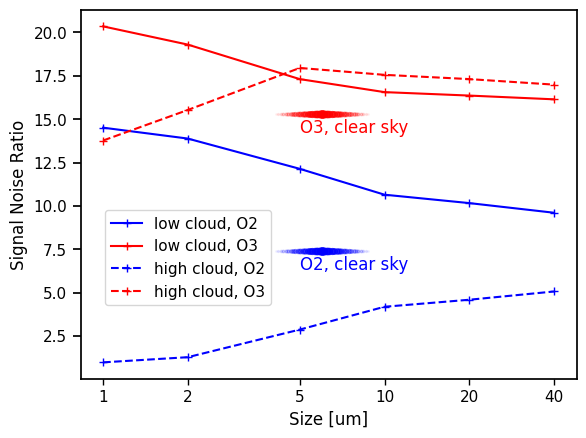

In [103]:
fig = plt.figure()
lstx = [1,2,5,10,20,40]
ax1 = fig.add_subplot(111)
ax1.plot(lstx,[lsty_o2[3]]+lsty_o2_level4,'-+',color='b',label='low cloud, O2')
ax1.plot(lstx,[lsty_o3[3]]+lsty_o3_level4,'-+',color='r',label='low cloud, O3')
ax1.plot(lstx,[lsty_o2[13]]+lsty_o2_level14,'--+',color='b',label='high cloud, O2')
ax1.plot(lstx,[lsty_o3[13]]+lsty_o3_level14,'--+',color='r',label='high cloud, O3')

for i in range(20):
    ax1.plot(6*1.02**i,clsky_SNR_o2, 'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='b')
    ax1.plot(6*1.02**(-i),clsky_SNR_o2, 'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='b')
    ax1.plot(6*1.02**i,clsky_SNR_o3, 'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='r')
    ax1.plot(6*1.02**(-i),clsky_SNR_o3, 'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='r')

# ax1.plot(6,clsky_SNR_o2,'o',markersize=5 ,color='b')
# ax1.plot(6,clsky_SNR_o3,'o',markersize=5 ,color='r')
ax1.text(5,clsky_SNR_o2-1.1, 'O2, clear sky', color='b')
ax1.text(5,clsky_SNR_o3-1.1, 'O3, clear sky', color='r')
ax1.set_ylabel("Signal Noise Ratio")
ax1.set_xlabel("Size [um]")
ax1.set_xscale('log')
plt.xticks([])
plt.xticks([1,2,5,10,20,40], ['1','2','5','10','20','40'],minor=True) 
ax1.legend(loc=[0.05,0.2])

plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output_size/SNR-height.pdf")

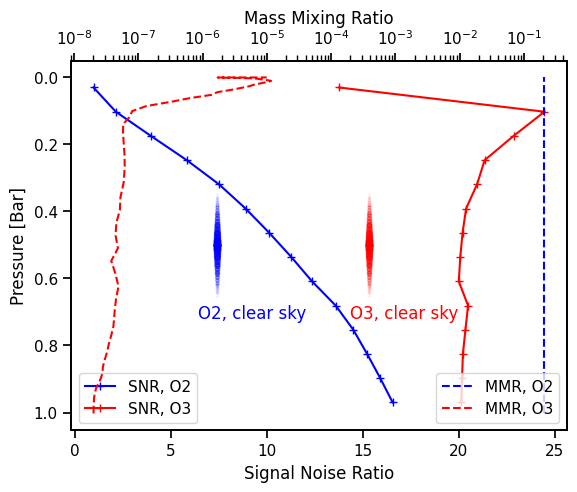

In [105]:
## Summary of Pressure Experiments
sns.set_context('notebook')
fig = plt.figure()
lstx =list(np.linspace(1-0.03, 0.03, 14))
ax1 = fig.add_subplot(111)
ax2 = ax1.twiny()

ax1.plot(lsty_o2, lstx,'-+',color='b',label='SNR, O2')
ax1.plot(lsty_o3, lstx,'-+',color='r',label='SNR, O3')
# ax1.plot(clsky_SNR_o2, 0.5,'o',markersize=5 ,color='b')
# ax1.plot(clsky_SNR_o3, 0.5,'o',markersize=5 ,color='r')

for i in range(20):
    ax1.plot(clsky_SNR_o2, 0.5+0.008*i,'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='b')
    ax1.plot(clsky_SNR_o2, 0.5-0.008*i,'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='b')
    ax1.plot(clsky_SNR_o3, 0.5+0.008*i,'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='r')
    ax1.plot(clsky_SNR_o3, 0.5-0.008*i,'o',alpha = 0.9-0.045*i ,markersize=5-0.2*i ,color='r')


ax1.text(clsky_SNR_o2-1, 0.72, 'O2, clear sky', color='b')
ax1.text(clsky_SNR_o3-1, 0.72, 'O3, clear sky', color='r')

ax2.plot(o2_conc,pressure,'--',color='b',label='MMR, O2')
ax2.plot(o3_conc,pressure,'--',color='r',label='MMR, O3')

ax1.set_xlabel("Signal Noise Ratio")
ax2.set_xlabel('Mass Mixing Ratio')
ax2.set_xscale('log')

ax1.set_ylabel("Pressure [Bar]")
ax1.invert_yaxis()

ax1.legend(loc=3)
ax2.legend(loc=4)


plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output_pressure/SNR-height.pdf")

In [42]:
# DATA VARYING PRESSURE
# UV (200 to 525 nm), VIS (515 nm to 1030 nm), and NIR (1 to 2 microns)
# with and without o2 & o3
lsty_o2 = []
lsty_o3 = []
# f = open(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/SNRresults", "w")
#     f.write(f"mmr{trial}, N{N}:\n")

earth_cloud_luv_a_nir   = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq/augmented_input_file_17bins_nir.txt")
earth_cloud_luv_a_uv    = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq/augmented_input_file_17bins_uv.txt")
earth_cloud_luv_a_vis   = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq/augmented_input_file_17bins_vis.txt")
earth_o2_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o2/augmented_input_file_17bins_nir.txt")
earth_o2_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o2/augmented_input_file_17bins_uv.txt")
earth_o2_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o2/augmented_input_file_17bins_vis.txt")
earth_o3_luv_a_nir      = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o3/augmented_input_file_17bins_nir.txt")
earth_o3_luv_a_uv       = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o3/augmented_input_file_17bins_uv.txt")
earth_o3_luv_a_vis      = open(f"/Users/jeffyang/Desktop/PSG/CARMA_input/CARMA_liq_output/CARMA_liq_o3/augmented_input_file_17bins_vis.txt")

a_vis       = pd.DataFrame()
a_uv        = pd.DataFrame()
a_nir       = pd.DataFrame()
a_vis_o2    = pd.DataFrame()
a_uv_o2     = pd.DataFrame()
a_nir_o2    = pd.DataFrame()
a_vis_o3    = pd.DataFrame()
a_uv_o3     = pd.DataFrame()
a_nir_o3    = pd.DataFrame()
    
a_vis       = prettydata(earth_cloud_luv_a_vis)
a_uv        = prettydata(earth_cloud_luv_a_uv) 
a_nir       = prettydata(earth_cloud_luv_a_nir)
a_vis_o2    = prettydata(earth_o2_luv_a_vis)
a_uv_o2     = prettydata(earth_o2_luv_a_uv)
a_nir_o2    = prettydata(earth_o2_luv_a_nir)
a_vis_o3    = prettydata(earth_o3_luv_a_vis)
a_uv_o3     = prettydata(earth_o3_luv_a_uv)
a_nir_o3    = prettydata(earth_o3_luv_a_nir)

frame_w     = [a_uv, a_vis, a_nir]
frame_o2    = [a_uv_o2, a_vis_o2, a_nir_o2]
frame_o3    = [a_uv_o3, a_vis_o3, a_nir_o3]

all_a_with  = pd.concat(frame_w, ignore_index= True) 
all_a_o2    = pd.concat(frame_o2, ignore_index= True)
all_a_o3    = pd.concat(frame_o3, ignore_index= True)
        
signal_a_o2 = all_a_o2['Total']- all_a_with['Total']
signal_a_o3 = all_a_o3['Total']- all_a_with['Total']
noise_a     = all_a_with['Noise'] #noise should be the same for all_a_with and all_a_no right? check cuz data show otherwise
    
signal_a_o2_list = signal_a_o2.tolist() #convert signal_a from series to list
signal_a_o3_list = signal_a_o3.tolist() #convert signal_a from series to list
noise_a_list     = noise_a.tolist() #convert noise_a from series to list

snr_o2 = []
snr_o3 = []
for i in range(signal_a_o2.size):
        snr = signal_a_o2_list[i] / noise_a_list[i]
        snr_o2.append(snr)
        snr = signal_a_o3_list[i] / noise_a_list[i]
        snr_o3.append(snr)

SNR_o2 = RMS(snr_o2)
SNR_o3 = RMS(snr_o3)
#     f.write('SNR (noise with):' + " " + str(SNR) + "\n")
lsty_o2.append(SNR_o2)
lsty_o3.append(SNR_o3)
    
#     f1 = plt.figure()
#     plt.plot(all_a_with['Wave/freq'], all_a_with['Total'],'.')
#     plt.plot(all_a_no['Wave/freq'],all_a_no['Total'],'+')
#     plt.xlabel('Wavelength[micrometer]')
#     plt.ylabel('albedo')
#     plt.title('Signal (with and no) v. Wavelength')
#     plt.savefig(f"/Users/jeffyang/Desktop/PSG/psg_output/mmr3_without/N_{N}")
# f.close()


In [45]:
lsty_o2,lsty_o3, clsky_SNR_o2, clsky_SNR_o3

([7.404524918788476],
 [15.32014400458624],
 7.404524918788476,
 15.32014400458624)